In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

In [6]:
import sys
sys.path += ['C:\\Users\\love-\\Documents\\Homeworks\\80-629\\week3-Supervised']


In [7]:
from utils import generate_data, plot_predictions, plot_svc_decision_function


ModuleNotFoundError: No module named 'utils'

# Question 2 - Classification

## Question 2.1

In [ ]:
data = np.load("a22_devoir_q2-classification.npz")
X = data["X"]
y = data["y"]


In [ ]:
print(y)


[0 2 0 2 2 0 0 2 1 0 2 1 1 2 2 0 2 1 2 1 1 0 1 1 1 0 1 0 1 1 0 0 1 2 2 2 2
 0 2 2 0 2 2 2 1 0 1 0 1 2 0 1 0 0 0 2 1 2 2 2 1 1 1 1 0 0 0 2 1 0 0 1 0 2
 0 0 0 1 0 1 1 2 2 0 2 2 0 2 0 2 0 1 1 2 0 1 2 1 1 1]


In [ ]:
print(X)
print(X[0])


[[ 0.15494743  0.37816252]
 [ 4.6781908   3.88829842]
 [ 0.06651722  0.3024719 ]
 [ 4.44780833  5.02608254]
 [ 4.77223375  5.00873958]
 [ 1.53277921  1.46935877]
 [ 0.17742614 -0.40178094]
 [ 4.68207696  5.33821665]
 [ 3.26816936  1.23011275]
 [-1.70627019  1.9507754 ]
 [ 5.5940149   5.15847131]
 [ 0.13905245  1.57791809]
 [ 2.50844214  2.11119275]
 [ 4.95077374  4.66826086]
 [ 6.08161797  5.66826397]
 [ 0.14404357  1.45427351]
 [ 4.9658792   5.85667136]
 [ 2.42111906  2.88331001]
 [ 5.28829541  4.89585062]
 [ 0.45814821  1.27554819]
 [ 0.34512589  2.30887379]
 [-0.51080514 -1.18063218]
 [ 1.81241247  2.96495855]
 [ 2.10351246  0.47278486]
 [ 2.0345496   2.55985975]
 [ 0.8644362  -0.74216502]
 [ 0.89523458  3.33366761]
 [ 1.86755799 -0.97727788]
 [-0.24772476  2.85123973]
 [ 4.32472605 -0.52163859]
 [ 1.23029068  1.20237985]
 [ 2.26975462 -1.45436567]
 [-0.25968511  4.41543178]
 [ 5.31261573  4.19897117]
 [ 5.38589528  5.41175208]
 [ 4.49989233  4.22761445]
 [ 4.35357155  5.13352543]
 

In [ ]:
X.shape


(100, 2)

In [ ]:
X.mean()


2.2693209543318646

In [ ]:
x1, x2 = zip(*X)


(array([ 4.,  8., 17.,  7., 11.,  6.,  8.,  9., 18., 12.]),
 array([-1.98079647, -1.18624022, -0.39168397,  0.40287228,  1.19742853,
         1.99198478,  2.78654103,  3.58109728,  4.37565353,  5.17020978,
         5.96476603]),
 <BarContainer object of 10 artists>)

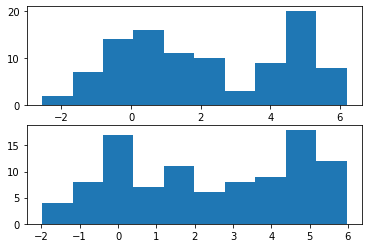

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x1)
ax2.hist(x2)


(array([[ 2.,  7., 14., 16., 11., 10.,  3.,  9., 20.,  8.],
        [ 2.,  6., 13., 15., 10.,  6.,  9., 11., 17., 11.]]),
 array([-2.55298982, -1.6785336 , -0.80407738,  0.07037885,  0.94483507,
         1.81929129,  2.69374751,  3.56820373,  4.44265995,  5.31711617,
         6.19157239]),
 <a list of 2 BarContainer objects>)

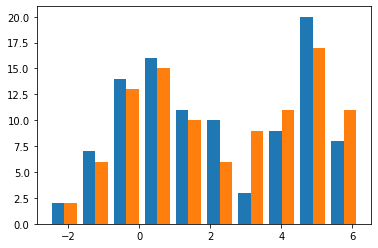

In [ ]:
plt.hist(X)


c:\Users\love-\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


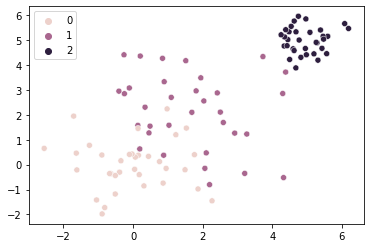

In [ ]:
sns.scatterplot(x1, x2, hue=y)
plt.show()


In [ ]:
# (4pt) Suite `a une exploration des donn´ees, que remarquez-vous?
# Il y a deux grands groupes que l'on peut appercevoir.
# Que pouvez-vous dire de la performance (taux de bonne classification) de test
# d’un mod`ele n’utilisant que des fronti`eres de d´ecision lin´eaire pour ce probl`eme?


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [ ]:
def OLS(X, y):
    # Note: on transforme simplement les cibles de {0,1} à {-1,+1}
    Y = (X_train[1]*2)-1
    Y = Y.reshape(2, 1)

    # On calcule les paramètres du modèle
    # (c'est le même calcul que celui de la semaine dernière pour w_ols)
    A = np.linalg.inv(np.dot(X.T, X))
    B = np.dot(X.T, Y)

    return np.dot(A, B)

# pour obtenir la frontière de décision visuellement


def calculate_decision_boundary(W):
    x_1 = np.linspace(-10, 10)  # <- pour x1;

    # Le but est donc de calculer x2 à partir de x1 et des poids.
    x_2 = (-W[0] - W[1]*x_1) / W[2]
    return x_1, x_2


In [ ]:
X = X_train

# On ajoute une colonne de 1 aux données
# Ça nous permet d'apprendre le biais (w0 dans: w_1x + w0)
X_b = np.array([np.ones(len(X)), X[:, 0], X[:, 1]]).T
####

Y = y_train
X_test = X_test

# Comme plus haut on ajoute une colonne de 1 aux données de test
X_test_b = np.array([np.ones(len(X_test)), X_test[:, 0], X_test[:, 1]]).T
###

Y_test = y_test

# 1) On (estime) entraîne les paramètres
# k est le nombre de classes et dim est la dimensionalité des données
W = OLS(X_b, Y)  # dim x k

# 2) Une fois les paramètres obtenus, on peut obtenir les prédictions
# a) for test data
y_x = np.dot(W.T, X_test_b.T)  # valeur réelle
pred_test = 1*(y_x > 0)[0]  # valeur binaire

# b) Idem pour l'ensemble d'entraînement
y_x = np.dot(W.T, X_b.T)
pred_train = 1*(y_x > 0)[0]


# 3) On calcule aussi la frontière de décision
#    pour pouvoir la visualiser
line_x, line_y = calculate_decision_boundary(W)


# 4) Rendu visuel
plot_predictions(X, Y, X_test, Y_test, pred_train, pred_test, line_x, line_y)


ValueError: shapes (3,67) and (2,1) not aligned: 67 (dim 1) != 2 (dim 0)

## Question 2.2

In [ ]:
# (6pt) Divide your dataset into training, validation, and test sets.
# The validation and test sets must each make up 20% of the total original dataset (so 40% in total).
# Make sure to use this parameter upon calling the appropriate sklearn function: random state=1234.
# Train a linear SVM on the training set for each one of these C hyperparameter values: {0.001,0.01,0.1,1,10}.
# For each value of C, what is the performance (accuracy) of the model on the training and validation sets?
#  Given your answer, obtain the performance of the best model on the test set.
#  We ask that you provide the few lines of code you used to divide the data, train the model, and obtain the accuracy.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1234)  # 0.25 x 0.8 = 0.2


In [ ]:
cs = [0.001, 0.01, 0.1, 1, 10]
for i, c in enumerate(cs):
    model = SVC(kernel='linear', C=c)
    model.fit(X_train, y_train)

    acc_train = (sum(model.predict(X_train) == y_train)/len(y_train))*100
    acc_validation = (sum(model.predict(X_val) == y_val)/len(y_val)) * 100

    print("With a value of C: ", c, ", the accuracy of the train model is", acc_train,
          "% anf<d the accuracy of the  validation model is", acc_validation, "%")


With a value of C:  0.001 , the accuracy of the train model is 41.66666666666667 % ans the accuracy of the  validation model is 30.0 %
With a value of C:  0.01 , the accuracy of the train model is 83.33333333333334 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  0.1 , the accuracy of the train model is 86.66666666666667 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  1 , the accuracy of the train model is 90.0 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  10 , the accuracy of the train model is 90.0 % ans the accuracy of the  validation model is 95.0 %


In [ ]:
model = SVC(kernel='linear', C=10)
model.fit(X_train, y_train)

acc_test = (sum(model.predict(X_test) == y_test)/len(y_test)) * 100

print("With a value of C: ", c, ", the accuracy of the test model is", acc_test, "%")


With a value of C:  10 , the accuracy of the test model is 85.0 %


## Question 2.3

In [ ]:
# (4pt) Retrain the SVM model using 10-fold cross-validation for each of the C hyperparameter values from above.
# For each value of C, provide the training and validation accuracies as well as the performance on the test set of the best model.
#  Careful that you must use the same test set in both cases (previous question and this question)!
#  We ask that you provide the few lines of codes you used to divide the data, train the model, and obtain all accuracies.


In [ ]:
from sklearn.model_selection import cross_validate


In [ ]:
# We keep validation and train together unlike the question above
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)


In [ ]:
for c in cs:
    model = SVC(kernel='linear', C=c, random_state=1234)
    test = model.fit(X_train, y_train)

    scores = cross_validate(test, X_train,  y_train,
                            cv=10,  return_train_score=True)

    #acc_train = (sum(model.predict(X_train)==y_train)/len(y_train))*100
    #acc_validation =  (sum(model.predict(X_val)==y_val)/len(y_val)) *100

    print("With a value of C: ", c, ", the mean accuracy of the train model is", scores['train_score'].mean(
    ), '% and the mean accuracy of the validation model is', scores['test_score'].mean(), '%')


With a value of C:  0.001 , the mean accuracy of the train model is 0.3875 % and the mean accuracy of the validation model is 0.3875 %
With a value of C:  0.01 , the mean accuracy of the train model is 0.861111111111111 % and the mean accuracy of the validation model is 0.85 %
With a value of C:  0.1 , the mean accuracy of the train model is 0.8777777777777779 % and the mean accuracy of the validation model is 0.8625 %
With a value of C:  1 , the mean accuracy of the train model is 0.9027777777777777 % and the mean accuracy of the validation model is 0.8625 %
With a value of C:  10 , the mean accuracy of the train model is 0.9152777777777776 % and the mean accuracy of the validation model is 0.875 %


In [ ]:
model = SVC(kernel='linear', C=10)

acc_test = (sum(test.predict(X_test) == y_test)/len(y_test)) * 100

print("With a value of C: ", c, ", the accuracy of the test model is", acc_test, "%")


With a value of C:  10 , the accuracy of the test model is 95.0 %


## Question 2.4 - (2pt) Explain precisely how is the validation performance evaluated when doing cross validation.


## Question 2.5 - (2pt) Do you obtain a better model with cross validation or without it? Justify your answer and explain your result.

# 

# Question 3 - Regression

## Question 3.1

In [5]:
q3 = pd.read_csv("/Users/mathieulamontagne/Homeworks/reviews.tsv",
                 sep='\t', header=None, names=['Rating', 'Review'])
q3


,Rating,Review
0,5,I like the item pricing. My granddaughter want...
1,4,Love the magnet easel... great for moving to d...
2,5,Both sides are magnetic. A real plus when you...
3,5,Bought one a few years ago for my daughter and...
4,4,I have a stainless steel refrigerator therefor...
...,...,...
9995,1,There are multiple shapes part like oval and t...
9996,5,My 2 1/2 year old loves playing with these puz...
9997,5,I only wish I bought this toy sooner! It was ...
9998,5,My not quite 2 year old grandson took to this ...


In [6]:
q3.isna().sum()


Rating    0
Review    7
dtype: int64

In [7]:
check = q3[q3['Review'].isna()]
check


,Rating,Review
2339,5,NaN
2702,5,NaN
4653,5,NaN
8751,5,NaN
8770,2,NaN
9258,4,NaN
9690,5,NaN


In [8]:
q3 = q3.dropna()


In [9]:
q3['Review'] = q3.Review.str.replace('[^a-zA-Z]', ' ')


<ipython-input-9-2a0fc7372c8a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  q3['Review'] = q3.Review.str.replace('[^a-zA-Z]', ' ')
<ipython-input-9-2a0fc7372c8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['Review'] = q3.Review.str.replace('[^a-zA-Z]', ' ')


In [10]:
q3['Rating'].shape


(9993,)

In [11]:
q3['Review'].shape


(9993,)

In [12]:
q3.isna().sum()


Rating    0
Review    0
dtype: int64

In [13]:
y = q3['Rating']
X = q3['Review']


In [14]:
X[0]


'I like the item pricing  My granddaughter wanted to mark on it but I wanted it just for the letters '

## Question 3.2

. (3pt) On vous demande ensuite d’obtenir une repr´esentation sac à mots (bag-of-words) des caract´eristiques (features). sklearn offre des fonctions pour y arriver. Pour limiter le temps d’entraˆınement requis, on vous demande d’utiliser un maximumde2000motsdansvotre vocabulaire (max features=2000) et d’utiliser la liste des mots vides de sklearn (stop words="english"). Cette liste permet de retirer des mots qui à priori ne seront pas utiles a la pr´ediction. Utilisez les autres param`etres par d´efaut de la fonction. Nous vous demandons les quelques lignes de code de sklearn que vous avez utilis´ees pour encoder (et seulement encoder) les donn´ees d’entraˆınement, de validation et de test.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1234)  # 0.25 x 0.8 = 0.2


In [16]:
X_train


4946    This is a must have for any infant toy collect...
8509    My   year old received this game for Christmas...
6790    I bought this toy for my   boys    and    and ...
7615    Cute accessory for Calico Critters playhouse  ...
5438    After she killed a few sets of batteries   I p...
                              ...                        
2309    I have always wanted a chopper but found them ...
8211    Bought this set for my two year old twins that...
1232    Ok  if you have seen my other reviews then you...
3641    My cousins would always bring this game over f...
5500    She is really showing an interest in the state...
Name: Review, Length: 5995, dtype: object

In [17]:
y_train


4946    4
8509    4
6790    2
7615    4
5438    5
       ..
2309    4
8211    4
1232    4
3641    5
5500    5
Name: Rating, Length: 5995, dtype: int64

In [18]:
import nltk


In [19]:
from nltk.corpus import stopwords  # Import the stop word list
print(stopwords.words("english"))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
print("Creating the bag of words...\n")


vectorizer = CountVectorizer(analyzer="word",
                             stop_words="english",
                             max_features=2000)


train_data_features = vectorizer.fit_transform(X_train)
valid_data_features = vectorizer.fit_transform(X_val)
test_data_features = vectorizer.fit_transform(X_test)


train_data_features = train_data_features.toarray()
valid_data_features = valid_data_features.toarray()
test_data_features = test_data_features.toarray()


Creating the bag of words...



In [21]:
train_data_features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
print(train_data_features.shape)
print(y_train.shape)
# This has 9993 rows and 2000 features


(5995, 2000)
(5995,)


In [23]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)


['aa', 'abc', 'abilities', 'ability', 'able', 'absolutely', 'abuse', 'access', 'accessories', 'accidentally', 'accurate', 'act', 'action', 'actions', 'activities', 'activity', 'actual', 'actually', 'adapter', 'add', 'added', 'addictive', 'adding', 'addition', 'additional', 'adds', 'adjust', 'admit', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'affair', 'affect', 'afraid', 'age', 'aged', 'ages', 'ago', 'agree', 'ahead', 'air', 'alike', 'allow', 'allowing', 'allows', 'alot', 'alphabet', 'alternative', 'amazing', 'amazingly', 'amazon', 'american', 'ancient', 'angle', 'animal', 'animals', 'annoying', 'answer', 'answers', 'apart', 'apparently', 'appeal', 'appealing', 'appear', 'appears', 'apples', 'appreciate', 'appropriate', 'area', 'aren', 'arkham', 'arm', 'armies', 'arms', 'arrived', 'art', 'arts', 'artwork', 'aside', 'ask', 'asked', 'asking', 'asks', 'aspect', 'assemble', 'assembled', 'assembly', 'assistance', 'attach', 'attached', 'atta

In [24]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)


20 aa
23 abc
59 abilities
101 ability
353 able
20 absolutely
148 abuse
29 access
24 accessories
81 accidentally
62 accurate
27 act
40 action
53 actions
80 activities
336 activity
218 actual
96 actually
48 adapter
187 add
76 added
86 addictive
39 adding
43 addition
157 additional
265 adds
70 adjust
31 admit
42 adorable
22 adult
23 adults
349 advance
255 advanced
186 advantage
48 adventure
49 adventures
109 affair
22 affect
21 afraid
86 age
26 aged
23 ages
95 ago
41 agree
82 ahead
20 air
26 alike
29 allow
85 allowing
214 allows
25 alot
46 alphabet
92 alternative
92 amazing
100 amazingly
55 amazon
34 american
142 ancient
34 angle
42 animal
30 animals
57 annoying
72 answer
111 answers
48 apart
74 apparently
108 appeal
52 appealing
32 appear
82 appears
67 apples
35 appreciate
22 appropriate
58 area
22 aren
41 arkham
28 arm
44 armies
23 arms
51 arrived
94 art
27 arts
27 artwork
134 aside
29 ask
106 asked
43 asking
45 asks
27 aspect
292 assemble
108 assembled
33 assembly
65 assistance
307 att

## Question 3.4

(3pt) Which of the following three distance functions ‘cosine’, ’euclidean’, and ‘manhattan’ do you deem more appropriate for this problem? Please justify

Cosine permet de mesurer la proximité entre deux vecteurs qui est représenté par les unités de texte (train_data_features) 
Ainsi, si les vecteurs ont le même angle; ils ont une similarité cosine de 1
Si les deux deux vecteurs sont orientés à 90 degrés, ils ont une simlarité cosine de 0 
Enfin, si elles sont orientés à 180 degrés, donc totalement opposé, ils ont une similarité de 0.
Cosine normalise ainsi la similarité entre deux points pour chaque vecteur.

La distance euclédienne permet de mesurer la distance entre deux points dans un espace tel qu'exprimé par la mesure de pythagore. De ce fait, elle ne prend pas en considération l'angle de ceux-ci comme la mesure cosine.

La distance Manhattan est la somme des différences absolues entre deux points. Dans la mesure où les points se trouvent sur le même x ou le même y; la distance euclédienne et manhattan sont équivalente.

Ainsi, ces deux mesures sont similaires et réagissent similairement à la distance entre les mots. Plus un vecteur à des mots différents, plus son poids pèsera sur la balance.




## Question 3.5 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support


In [26]:
train_data_features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
nb_neighboors = [1, 10, 50, 100, 1000]
for neighboors in nb_neighboors:
    knn = KNeighborsClassifier(neighboors,
                               metric='cosine')
    knn.fit(train_data_features, y_train)

    knn_acc_train = (sum(knn.predict(train_data_features)
                         == y_train)/len(y_train))*100
    knn_acc_valid = (
        sum(knn.predict(valid_data_features) == y_val)/len(y_val))*100

    print("With", neighboors, " number of neighboors, the accuracy of the train model is", knn_acc_train,
          "% and the accuracy of the valid model is", knn_acc_valid, "%")


With 1  number of neighboors, the accuracy of the train model is 100.0 % and the accuracy of the valid model is 46.52326163081541 %
With 10  number of neighboors, the accuracy of the train model is 67.2393661384487 % and the accuracy of the valid model is 59.079539769884946 %
With 50  number of neighboors, the accuracy of the train model is 64.58715596330276 % and the accuracy of the valid model is 65.13256628314157 %
With 100  number of neighboors, the accuracy of the train model is 64.58715596330276 % and the accuracy of the valid model is 65.13256628314157 %
With 1000  number of neighboors, the accuracy of the train model is 64.58715596330276 % and the accuracy of the valid model is 65.28264132066033 %


In [28]:
y_train.value_counts(normalize=True)


5    0.645872
4    0.199500
3    0.089241
2    0.036530
1    0.028857
Name: Rating, dtype: float64

## Question 6

.5pt)Whatvalueofthehyperparameterprovidesthebestresults?Explain

## Question 10

In [62]:
from sklearn.neural_network import MLPClassifier
import random


In [64]:

alpha = [0.0, 0.5, 1.0]
learning_rates = [0.001, 0.01, 0.1]
nb_neurons = [10, 20, 30]
nb_hidden_layer = [10, 50, 100, 150, 500]


In [66]:
loss_train, loss_valid = [], []
list_nn_acc_valid, list_nn_acc_train, a_list, lr_list, neuron_list, layer_list, precision, recall = [
], [], [], [], [], [], [], []


for a in alpha:
    for lr in learning_rates:
        for neuron in nb_neurons:
            for count, layer in enumerate(nb_hidden_layer):
                nn = MLPClassifier(alpha=a,
                                   hidden_layer_sizes=(neuron, layer),
                                   random_state=1,
                                   learning_rate_init=lr,
                                   max_iter=100,
                                   early_stopping=True
                                   )
                nn.fit(train_data_features, y_train)

                nn_acc_train = nn.score(train_data_features, y_train)
                nn_acc_valid = nn.score(valid_data_features, y_val)

                unique, counts = np.unique(nn.predict(
                    valid_data_features), return_counts=True)

                loss_train.append(nn_acc_train)
                loss_valid.append(nn_acc_valid)

                print("With", a, lr, neuron, layer, " number of neighboors, the accuracy of the train model is", nn_acc_train,
                      "% and the accuracy of the valid model is", nn_acc_valid, "%")

                print(np.asarray((unique, (counts/len(y_val))*100)).T)

                for i in np.unique(y_val):
                    lmao = (sum(nn.predict(valid_data_features)
                                != i)/len(y_val == i))*100
                    print(i, lmao)

                prf = precision_recall_fscore_support(y_val, nn.predict(
                    valid_data_features), average='weighted', zero_division=1)

                list_nn_acc_train.append(nn_acc_train)
                list_nn_acc_valid.append(nn_acc_valid)
                a_list.append(a)
                lr_list.append(lr)
                neuron_list.append(neuron)
                layer_list.append(layer)
                precision.append(prf[0])
                recall.append(prf[1])


With 0.0 0.001 10 10  number of neighboors, the accuracy of the train model is 0.6892410341951626 % and the accuracy of the valid model is 0.5942971485742872 %
[[ 3.          4.65232616]
 [ 4.          7.00350175]
 [ 5.         88.34417209]]
1 100.0
2 100.0
3 95.34767383691846
4 92.99649824912456
5 11.655827913956978
With 0.0 0.001 10 50  number of neighboors, the accuracy of the train model is 0.6458715596330276 % and the accuracy of the valid model is 0.6523261630815408 %
[[2.00000000e+00 5.00250125e-02]
 [5.00000000e+00 9.99499750e+01]]
1 100.0
2 99.94997498749375
3 100.0
4 100.0
5 0.05002501250625312
With 0.0 0.001 10 100  number of neighboors, the accuracy of the train model is 0.6458715596330276 % and the accuracy of the valid model is 0.6528264132066033 %
[[  5. 100.]]
1 100.0
2 100.0
3 100.0
4 100.0
5 0.0
With 0.0 0.001 10 150  number of neighboors, the accuracy of the train model is 0.7414512093411176 % and the accuracy of the valid model is 0.5487743871935968 %
[[ 3.         

In [69]:

data_tuples = list(zip(a_list, lr_list, neuron_list, layer_list,
                       list_nn_acc_train, list_nn_acc_valid, precision, recall))
q3_data = pd.DataFrame(data_tuples, columns=['L2 Regularizarion term',
                                             'Learning Rate',
                                             'Number of neurons',
                                             'Number of layers',
                                             'Accuracy of Train',
                                             'Acccuracy of Valid',
                                             'Precision',
                                             'Recall'])
q3_data


,L2 Regularizarion term,Learning Rate,Number of neurons,Number of layers,Accuracy of Train,Acccuracy of Valid,Precision,Recall
0,0.0,0.001,10,10,0.689241,0.594297,0.527965,0.594297
1,0.0,0.001,10,50,0.645872,0.652326,0.743227,0.652326
2,0.0,0.001,10,100,0.645872,0.652826,0.773356,0.652826
3,0.0,0.001,10,150,0.741451,0.548774,0.533952,0.548774
4,0.0,0.001,10,500,0.754962,0.542771,0.527928,0.542771
...,...,...,...,...,...,...,...,...
130,1.0,0.100,30,10,0.649041,0.603802,0.694856,0.603802
131,1.0,0.100,30,50,0.648374,0.645823,0.627736,0.645823
132,1.0,0.100,30,100,0.661051,0.631816,0.664737,0.631816
133,1.0,0.100,30,150,0.648207,0.639320,0.647745,0.639320


In [95]:
q3_data.sort_values(['Acccuracy of Valid', 'Accuracy of Train'], ascending=[False, False])

,L2 Regularizarion term,Learning Rate,Number of neurons,Number of layers,Accuracy of Train,Acccuracy of Valid,Precision,Recall,row_max
106,1.0,0.010,10,50,0.647039,0.653327,0.677485,0.653327,0.653327
7,0.0,0.001,20,100,0.647873,0.652826,0.773356,0.652826,0.652826
17,0.0,0.010,10,100,0.647540,0.652826,0.773356,0.652826,0.652826
52,0.5,0.001,20,100,0.647540,0.652826,0.773356,0.652826,0.652826
62,0.5,0.010,10,100,0.646205,0.652826,0.773356,0.652826,0.652826
...,...,...,...,...,...,...,...,...,...
10,0.0,0.001,30,10,0.815680,0.500750,0.499633,0.500750,0.815680
104,1.0,0.001,30,500,0.798832,0.485743,0.520923,0.485743,0.798832
59,0.5,0.001,30,500,0.828190,0.484742,0.515759,0.484742,0.828190
60,0.5,0.010,10,10,0.766639,0.477739,0.500631,0.477739,0.766639


In [61]:
prf = precision_recall_fscore_support(y_val, nn.predict(
    valid_data_features), average='weighted', zero_division=1)
prf[0]


0.7007869154422267

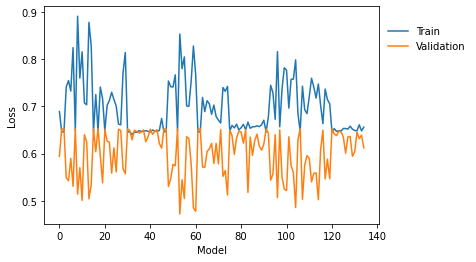

In [59]:
plt.plot(loss_train, label='Train')
plt.plot(loss_valid, label='Validation')

plt.xlabel('Model')
plt.ylabel('Loss')

# Ghosting the legend
leg = plt.gca().legend(loc='center left', bbox_to_anchor=(1, .85))
leg.get_frame().set_alpha(0)


In [50]:
y_val.value_counts(normalize=True)


5    0.652826
4    0.192596
3    0.098049
2    0.030015
1    0.026513
Name: Rating, dtype: float64

In [47]:
print(nn_acc_train)


0.6458715596330276


In [ ]:
print(np.asarray((unique, counts)).T)


[[   2    1]
 [   3    1]
 [   4   10]
 [   5 5983]]


In [ ]:
for i in np.unique(y_val):
    print(i)


1
2
3
4
5
